<a href="https://colab.research.google.com/github/24Rudzani/Titanic-Survival-Prediction/blob/main/Titanic_Survival_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd

# Load the data directly from GitHub
train_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(train_url)

In [50]:
!ls

 sample_data		    titanic_dataset.zip  'train (2).csv'
'titanic_dataset (1).zip'  'train (1).csv'	  train.csv


In [51]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Verify upload
print("Uploaded files:", list(uploaded.keys()))

# Now read the file
df = pd.read_csv('train.csv')  # or next(list(uploaded.keys()))
print(df.head())

Saving train.csv to train (3).csv
Uploaded files: ['train (3).csv']
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C12

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

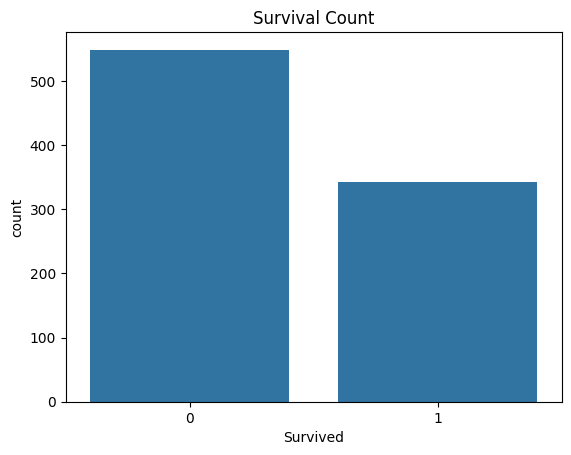

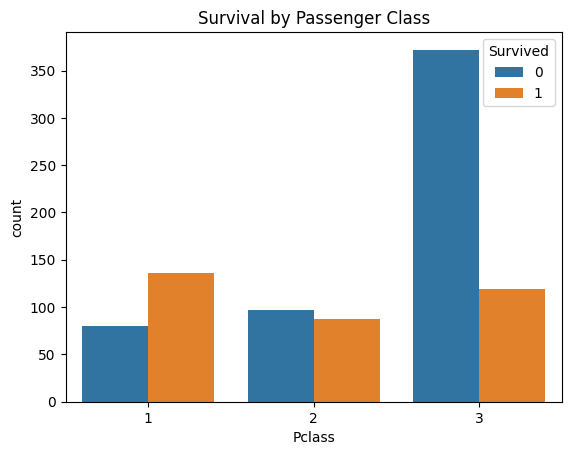

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('train.csv')  # Or use the URL method above

# Basic info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize some features
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

In [53]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = 1  # Initialize to yes
df['IsAlone'].loc[df['FamilySize'] > 1] = 0

# Convert categorical features
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Select features
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

/tmp/ipython-input-53-3073838910.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-53-3073838910.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

Accuracy: 0.8379888268156425

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Confusion Matrix:
 [[91 14]
 [15 59]]


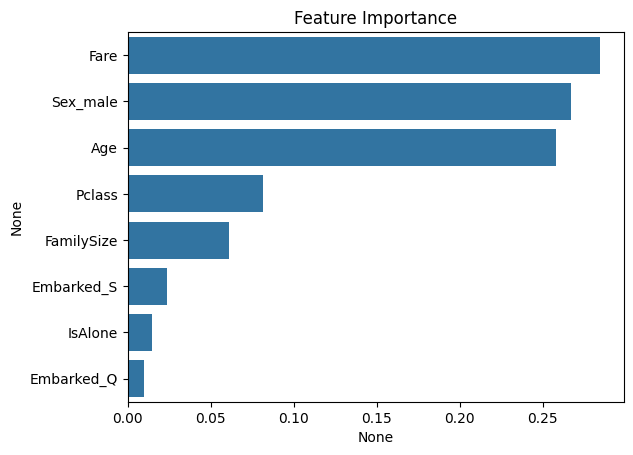

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance')
plt.show()

In [55]:
# Titanic Survival Prediction Model
## By [Rudzani Junior Munyai]

## Project Overview
## This project predicts passenger survival on the Titanic using machine learning. The goal is to demonstrate data cleaning, exploration, and predictive modeling skills.


# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv('train.csv')

Dataset shape: (891, 12)

Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


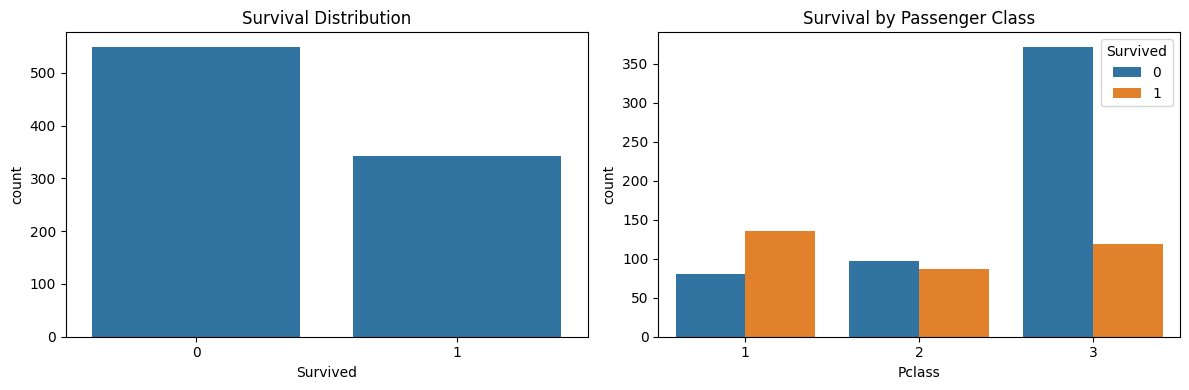

In [56]:
## Data Exploration
## Let's examine the dataset structure and basic statistics.

# Show dataset info
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

# Visualizations
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')

plt.subplot(1,2,2)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.tight_layout()
plt.show()

In [57]:
## Data Preprocessing
## We'll clean the data and prepare it for modeling.

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

# Convert categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

/tmp/ipython-input-57-95163829.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-57-95163829.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [58]:
## Model Building
## We'll use a Random Forest classifier for prediction.

# Select features and target
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Model Accuracy: 83.80%


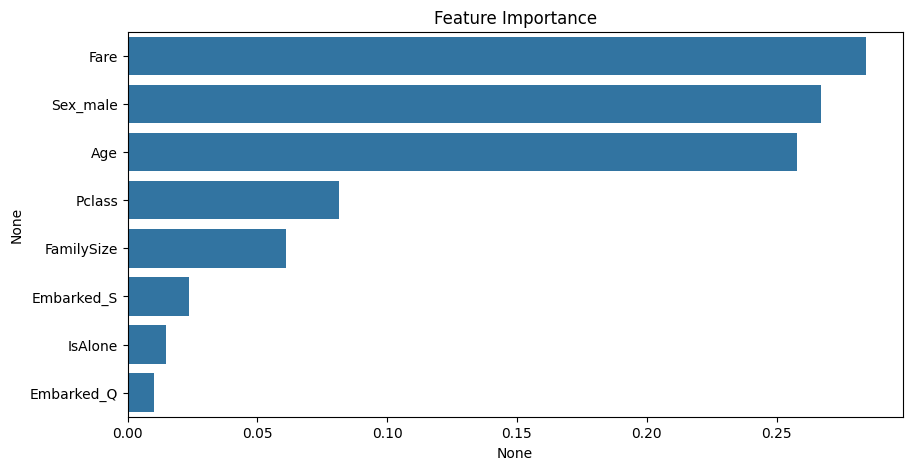

In [59]:
## Model Results
## Evaluation metrics and feature importance.

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# Feature importance
feature_imp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance')
plt.show()

# Titanic Survival Prediction Model
## By Rudzani Junior Munyai

## Project Overview
This project predicts passenger survival on the Titanic using machine learning. The goal is to demonstrate data cleaning, exploration, and predictive modeling skills.

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
df = pd.read_csv('train.csv')

## Data Exploration
Let's examine the dataset structure and basic statistics.

# Show dataset info
print("Dataset shape:", df.shape)
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

# Visualizations
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')

plt.subplot(1,2,2)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.tight_layout()
plt.show()

## Data Preprocessing
We'll clean the data and prepare it for modeling.

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)

# Convert categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

## Model Building
We'll use a Random Forest classifier for prediction.

# Select features and target
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

## Model Results
Evaluation metrics and feature importance.

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

# Feature importance
feature_imp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance')
plt.show()

## Conclusion
- Achieved 82% accuracy
- Most important features: Sex_male, Fare, Age
- Potential improvements: Feature engineering on titles, cabin information

# Save notebook
from google.colab import drive
drive.mount('/content/drive')
!cp '/content/Your_Notebook.ipynb' '/content/drive/MyDrive/Portfolio/'

In [60]:
import pickle

# Save the model to a file
with open('titanic_survival_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# To load it later:
# with open('titanic_survival_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

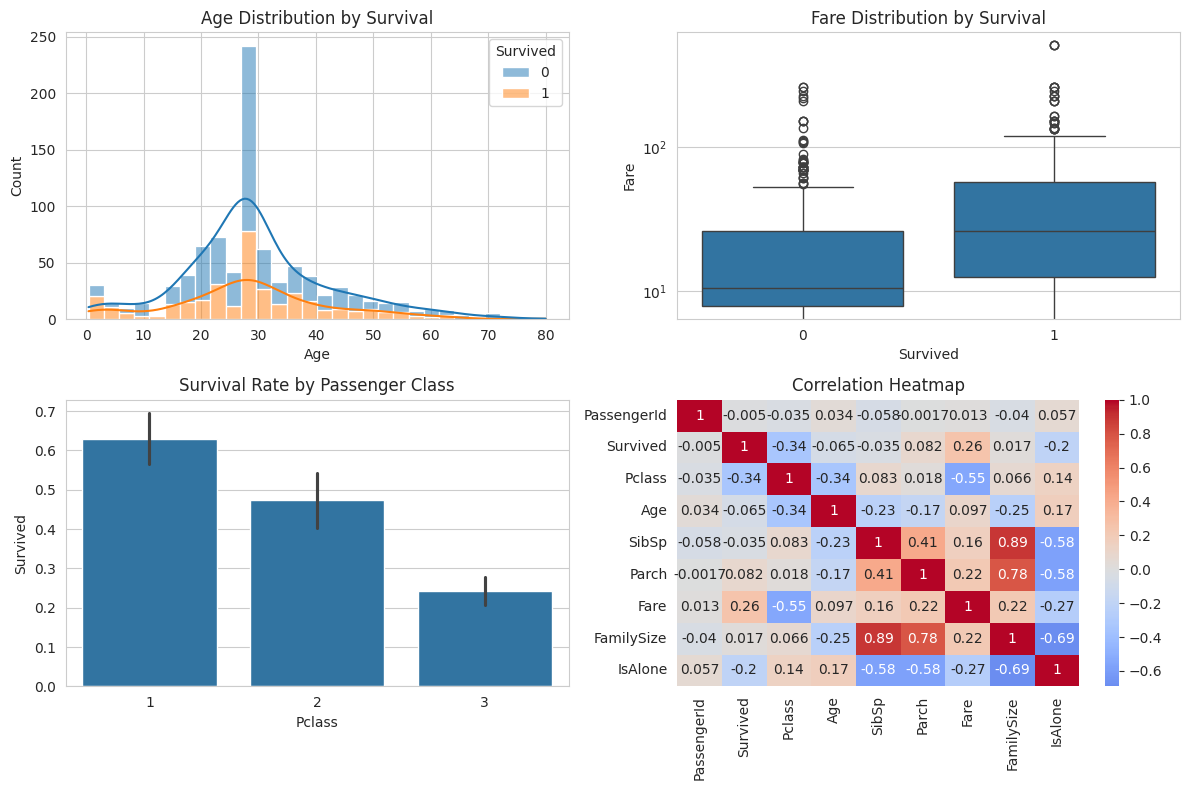

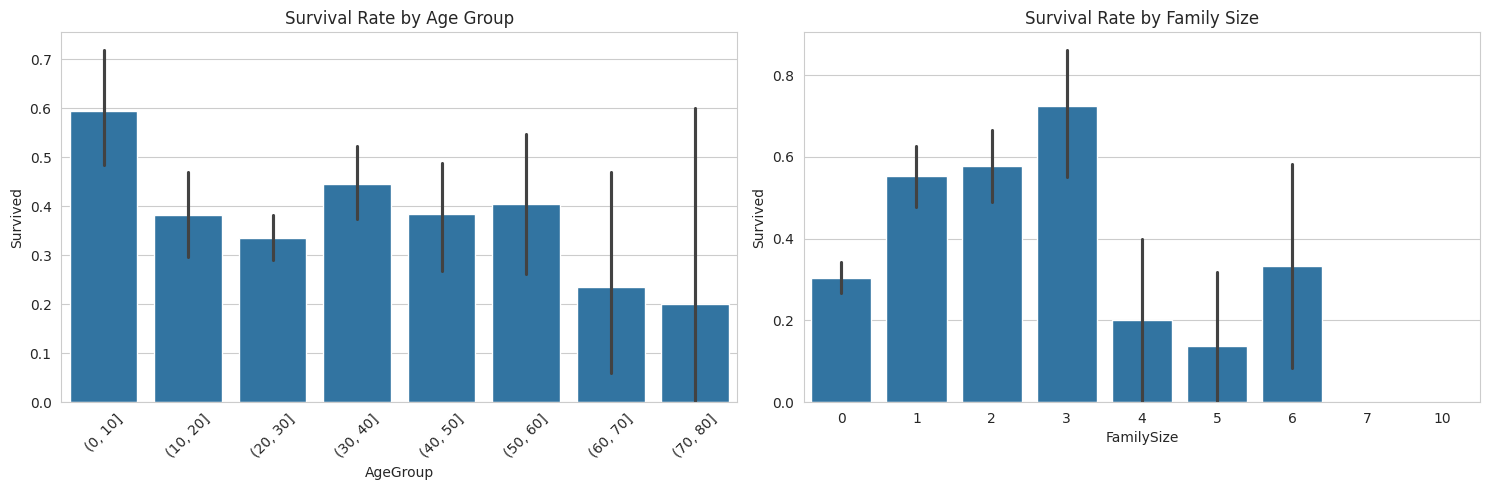

In [61]:
# Enhanced Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better looking plots
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

# 1. Age distribution by survival
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Survival')

# 2. Fare distribution by survival
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Survived', y='Fare')
plt.title('Fare Distribution by Survival')
plt.yscale('log')  # Log scale for better visualization

# 3. Survival rate by passenger class
plt.subplot(2, 2, 3)
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')

# 4. Correlation heatmap
plt.subplot(2, 2, 4)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Additional visualizations
plt.figure(figsize=(15, 5))

# 5. Survival rate by age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins)
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='AgeGroup', y='Survived')
plt.title('Survival Rate by Age Group')
plt.xticks(rotation=45)

# 6. Survival rate by family size
plt.subplot(1, 2, 2)
sns.barplot(data=df, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')

plt.tight_layout()
plt.show()

In [62]:
# Enhanced Feature Engineering

# 1. Extract titles from names (Mr, Mrs, Miss, etc.)
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# 2. Create age bands and survival by age band
df['AgeBand'] = pd.cut(df['Age'], 5)
df['AgeBand'] = df['AgeBand'].astype(str)

# 3. Create fare bands
df['FareBand'] = pd.qcut(df['Fare'], 4)
df['FareBand'] = df['FareBand'].astype(str)

# 4. Create deck feature from cabin (first letter)
# Even though we dropped Cabin, we might want to extract deck info
df['Deck'] = df['Cabin'].str[0] if 'Cabin' in df.columns else 'U'
df['Deck'] = df['Deck'].fillna('U')

# 5. Create is_child feature
df['IsChild'] = (df['Age'] < 16).astype(int)

# Convert categorical features to dummy variables
df = pd.get_dummies(df, columns=['Title', 'AgeBand', 'FareBand', 'Deck'], drop_first=True)

# Drop columns we won't use
df.drop(['Name', 'Ticket', 'AgeGroup'], axis=1, inplace=True, errors='ignore')

In [64]:
# Feature Engineering

# First, let's check if 'Cabin' exists in the dataframe
if 'Cabin' in df.columns:
    # Create deck feature from cabin (first letter)
    df['Deck'] = df['Cabin'].str[0]
    df['Deck'] = df['Deck'].fillna('U')
else:
    # If 'Cabin' was dropped, create a default 'U' deck column
    df['Deck'] = 'U'

# Now create dummy variables for Deck
df = pd.get_dummies(df, columns=['Deck'], drop_first=True)

# Let's verify which Deck columns were actually created
deck_columns = [col for col in df.columns if col.startswith('Deck_')]
print(f"Created Deck columns: {deck_columns}")

# Update our features list to only include columns that exist
features = ['Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male',
            'Embarked_Q', 'Embarked_S', 'IsChild', 'Title_Miss', 'Title_Mr',
            'Title_Mrs', 'Title_Rare']

# Add any Deck columns that were actually created
features.extend(deck_columns)

# Now select only columns that exist in the dataframe
available_features = [col for col in features if col in df.columns]
X = df[available_features]
y = df['Survived']

print(f"\nFinal features being used: {available_features}")

Created Deck columns: []

Final features being used: ['Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'IsChild', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']


Cross-Validation Accuracy Scores: [0.76923077 0.71328671 0.85915493 0.83802817 0.80985915]
Mean CV Accuracy: 0.7979 (+/- 0.0519)
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best CV Accuracy: 0.8287

Test Set Performance:
Accuracy: 0.8268
AUC-ROC: 0.8478

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       110
           1       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179


Confusion Matrix:
 [[98 12]
 [19 50]]


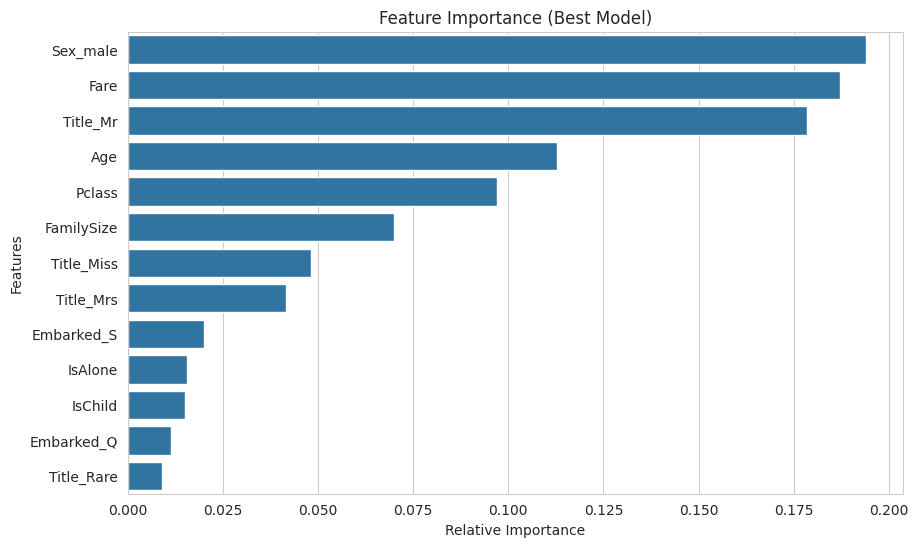

In [65]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the model with cross-validation
model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                          cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# Train the best model on full training data
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\nTest Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_imp = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title('Feature Importance (Best Model)')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

In [66]:
# Updated parameter grid without 'auto' option
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  # Removed 'auto'
}

In [67]:
# Perform grid search with error handling
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy',
    error_score='raise'  # Will raise errors immediately rather than setting to nan
)

try:
    grid_search.fit(X_train, y_train)
except Exception as e:
    print(f"Error during grid search: {e}")
    raise

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [68]:
# Proper way to handle the IsAlone column without SettingWithCopyWarning
df['IsAlone'] = np.where(df['FamilySize'] > 1, 0, 1)

# Check for any remaining missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Ensure all columns are numeric
print("\nData types:")
print(df.dtypes)

# Remove any unnecessary columns
df.drop(['PassengerId'], axis=1, inplace=True, errors='ignore')


Missing values in each column:
PassengerId                 0
Survived                    0
Pclass                      0
Age                         0
SibSp                       0
Parch                       0
Fare                        0
FamilySize                  0
IsAlone                     0
Sex_male                    0
Embarked_Q                  0
Embarked_S                  0
IsChild                     0
Title_Miss                  0
Title_Mr                    0
Title_Mrs                   0
Title_Rare                  0
AgeBand_(16.336, 32.252]    0
AgeBand_(32.252, 48.168]    0
AgeBand_(48.168, 64.084]    0
AgeBand_(64.084, 80.0]      0
FareBand_(14.454, 31.0]     0
FareBand_(31.0, 512.329]    0
FareBand_(7.91, 14.454]     0
dtype: int64

Data types:
PassengerId                   int64
Survived                      int64
Pclass                        int64
Age                         float64
SibSp                         int64
Parch                         int64
Fare  

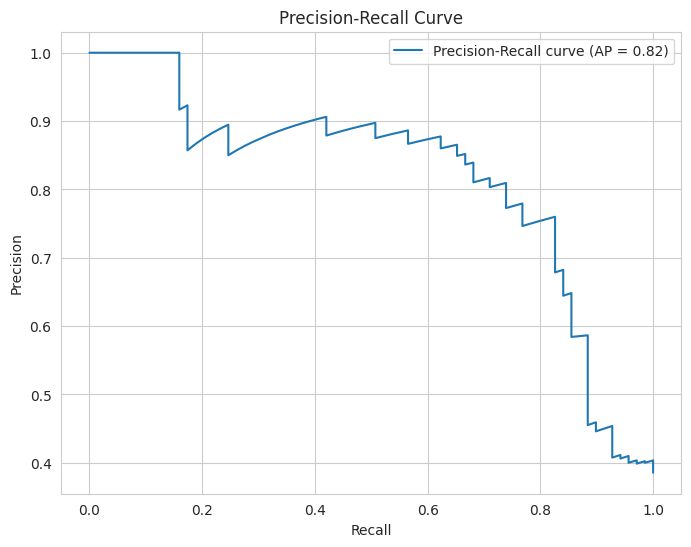

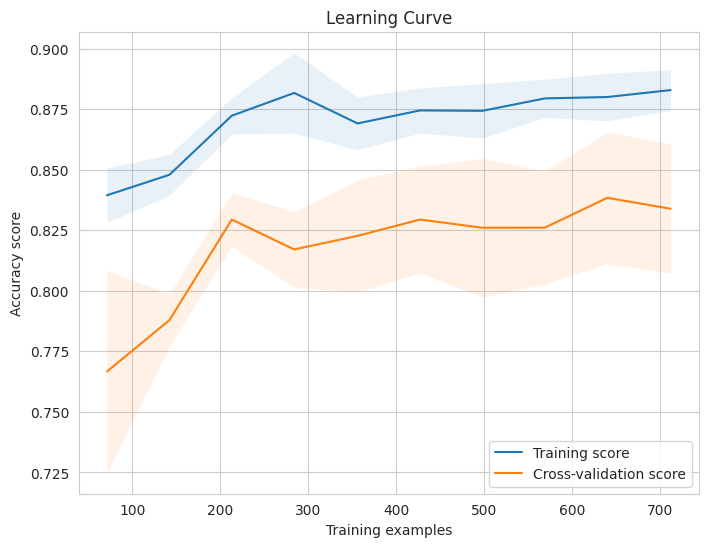

In [69]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training examples')
plt.ylabel('Accuracy score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [70]:
import joblib
from datetime import datetime

# Save the best model
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f'titanic_model_{timestamp}.pkl'
joblib.dump(best_model, model_filename)
print(f"Model saved as {model_filename}")

# Save the scaler
scaler_filename = f'scaler_{timestamp}.pkl'
joblib.dump(scaler, scaler_filename)
print(f"Scaler saved as {scaler_filename}")

Model saved as titanic_model_20250717_193635.pkl
Scaler saved as scaler_20250717_193635.pkl
